#Installing Dependencies
This cell installs the requests and pandas libraries, which are essential for making API calls and handling data. requests is used to fetch job data from an API, while pandas helps in managing and analyzing the job data.

In [ ]:
!pip install requests pandas

#Import Libraries
This cell imports the libraries installed in the previous step. requests will handle API interactions, and pandas will manage the data as a DataFrame, making it easier to analyze and manipulate.



In [ ]:
import requests
import pandas as pd


#API Data Collection
This cell connects to the Adzuna job API, requesting job data for "Data Analyst" positions across multiple pages. The data is parsed into a dictionary format and then converted into a DataFrame for easy handling. Finally, it resets the DataFrame's index and displays the results.

In [ ]:
import requests
import pandas as pd

# Adzuna API credentials
APP_ID = 'YOUR APP_ID'
APP_KEY = 'YOUR APP_KEY'

# API endpoint and parameters
country = 'us'  # Country code (e.g., 'us' for USA)
results_per_page = 20  # Max results per page (20 is the max allowed)

# Total number of results you want to fetch
total_results = 200
total_pages = total_results // results_per_page  # Calculate number of pages to fetch

# List to store all job data
all_jobs = []

# Search keyword for Data Analyst jobs
search_query = "Data Analyst"

# Fetch data from multiple pages
for page in range(1, total_pages + 1):
    url = f'https://api.adzuna.com/v1/api/jobs/{country}/search/{page}'
    params = {
        'app_id': APP_ID,
        'app_key': APP_KEY,
        'results_per_page': results_per_page,
        'what': search_query  # Searching for "Data Analyst" jobs
    }

    # Make the API request
    response = requests.get(url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        job_data = response.json()

        # Add results to the all_jobs list
        all_jobs.extend(job_data['results'])
    else:
        print(f"Failed to fetch data for page {page}. Status code: {response.status_code}")
        print("Response:", response.text)
        break

# Create a DataFrame from the job data
job_list = []
for job in all_jobs:
    job_title = job.get('title')
    company_name = job.get('company', {}).get('display_name', 'N/A')
    location = job.get('location', {}).get('area', 'N/A')
    job_url = job.get('redirect_url')
    publication_date = job.get('created')

    job_list.append({
        'Job Title': job_title,
        'Company': company_name,
        'Location': location,
        'Job URL': job_url,
        'Date Posted': publication_date
    })

# Convert the list of job data into a DataFrame
df_jobs = pd.DataFrame(job_list)

# Reset the index and start from 1
df_jobs.index = df_jobs.index + 1

# Display the DataFrame
print(df_jobs)


                      Job Title                      Company  \
1                  Data Analyst                 NES Fircroft   
2                  Data Analyst  Technology Consulting, Inc.   
3                  Data Analyst                       Dexian   
4                  Data Analyst                Cohere Health   
5                  Data Analyst                Cohere Health   
..                          ...                          ...   
196  Data Analyst Summer Intern                     Experian   
197  Data Analyst Summer Intern                     Experian   
198  Data Analyst Summer Intern                     Experian   
199  Data Analyst Summer Intern                     Experian   
200  Data Analyst Summer Intern                     Experian   

                                              Location  \
1             [US, Minnesota, Houston County, Houston]   
2            [US, Kentucky, Fayette County, Lexington]   
3          [US, Massachusetts, Suffolk County, Boston]   

#Data Cleaning

In [ ]:
# Convert "Date Posted" to datetime
df_jobs['Date Posted'] = pd.to_datetime(df_jobs['Date Posted'], errors='coerce')

# Check for missing values
print(df_jobs.isnull().sum())

# Drop rows with missing important data (optional)
df_jobs.dropna(subset=['Job Title', 'Company'], inplace=True)


Job Title      0
Company        0
Location       0
Job URL        0
Date Posted    0
dtype: int64


#Flagging Suspicious Job based on Titles,company names, description, url, salary, job url

In [ ]:
suspicious_keywords = [
    'easy money', 'no experience', 'work from home', 'immediate hire', 'instant payout',
    'get paid to', 'part-time data analyst', 'urgent hiring', 'click here', 'sign up now',
    'hiring immediately', 'overseas job', 'make money fast', 'apply now', 'work at home'
]

def is_suspicious_title(job_title):
    if any(keyword.lower() in job_title.lower() for keyword in suspicious_keywords):
        return True
    return False

# Apply function to detect suspicious titles in Data Analyst job postings
df_jobs['Suspicious Title'] = df_jobs['Job Title'].apply(is_suspicious_title)


In [ ]:

suspicious_companies = ['Hiring Now', 'XYZ Data', 'Confidential', 'FakeCorp', 'JobAlert']

def is_suspicious_company(company_name):
    if any(keyword.lower() in company_name.lower() for keyword in suspicious_companies):
        return True
    return False

# Apply function to detect suspicious companies in Data Analyst job postings
df_jobs['Suspicious Company'] = df_jobs['Company'].apply(is_suspicious_company)


In [ ]:
def is_suspicious_description(job_title):
    suspicious_descriptions = ['No experience required', 'instant job', 'unlimited earnings', 'apply now', 'click here to apply', 'urgent']
    if any(keyword.lower() in job_title.lower() for keyword in suspicious_descriptions):
        return True
    return False

# Apply function to detect suspicious descriptions in Data Analyst roles
df_jobs['Suspicious Description'] = df_jobs['Job Title'].apply(is_suspicious_description)


In [ ]:
def is_suspicious_url(job_url):
    suspicious_domains = ['freejobsite.com', 'fakejobs.com', 'randomrecruiter.com']
    for domain in suspicious_domains:
        if domain in job_url:
            return True
    return False

# Apply function to detect suspicious URLs in Data Analyst postings
df_jobs['Suspicious URL'] = df_jobs['Job URL'].apply(is_suspicious_url)


In [ ]:
def is_suspicious_salary(job_title):
    high_salary_keywords = ['$100k', '$200k', 'six figures', 'overpaid', 'immediate bonus', 'instant payout']
    if any(keyword in job_title for keyword in high_salary_keywords):
        return True
    return False

# Apply function to detect suspicious salary claims in Data Analyst roles
df_jobs['Suspicious Salary'] = df_jobs['Job Title'].apply(is_suspicious_salary)


In [ ]:
# Function to check suspicious contact info
def is_suspicious_contact(job_url):
    if not job_url or 'contact' not in job_url.lower():
        return True
    return False

In [ ]:
job_list = []
for job in all_jobs:
    job_title = job.get('title')
    company_name = job.get('company', {}).get('display_name', 'N/A')
    location = job.get('location', {}).get('area', 'N/A')
    job_url = job.get('redirect_url')
    publication_date = job.get('created')

In [ ]:
# Add fake job checks
suspicious_title = is_suspicious_title(job_title)
suspicious_company = is_suspicious_company(company_name)
suspicious_description = is_suspicious_description(job_title)
suspicious_url = is_suspicious_url(job_url)
suspicious_salary = is_suspicious_salary(job_title)
suspicious_contact = is_suspicious_contact(job_url)
suspicious_data_analyst = is_suspicious_data_analyst(job_title)

In [ ]:
# Adding the job data to the list
job_list.append({
        'Job Title': job_title,
        'Company': company_name,
        'Location': location,
        'Job URL': job_url,
        'Date Posted': publication_date,
        'Suspicious Title': suspicious_title,
        'Suspicious Company': suspicious_company,
        'Suspicious Description': suspicious_description,
        'Suspicious URL': suspicious_url,
        'Suspicious Salary': suspicious_salary,
        'Suspicious Contact': suspicious_contact,
        'Suspicious Data Analyst': suspicious_data_analyst
    })

# Converting List to Data Frame

In [ ]:
# Convert the list of job data into a DataFrame
df_jobs = pd.DataFrame(job_list)

# Reset the index and start from 1
df_jobs.index = df_jobs.index + 1

In [ ]:
# Filter out suspicious jobs
df_jobs['Fake Job Indicator'] = (
    df_jobs['Suspicious Title'] |
    df_jobs['Suspicious Company'] |
    df_jobs['Suspicious URL'] |
    df_jobs['Suspicious Description'] |
    df_jobs['Suspicious Salary'] |
    df_jobs['Suspicious Contact'] |
    df_jobs['Suspicious Data Analyst']
)

#

### Analysis Result: Detection of Suspicious Job Postings

In this analysis, we applied criteria to flag potentially fake job postings. After filtering, we identified **only one job posting marked as suspicious** in the dataset. This result suggests that the dataset is relatively clean, with only minimal risk of fake postings based on the applied criteria.

Identifying even a single fake posting is valuable, as it highlights the effectiveness of our filtering approach. For datasets with larger volumes, such an analysis could help streamline job listing reviews and increase confidence in the authenticity of job opportunities.


In [ ]:
# Filter suspicious jobs
fake_jobs = df_jobs[df_jobs['Fake Job Indicator'] == True]

# Display the filtered DataFrame
print(fake_jobs)

# Keep the original DataFrame (df_jobs) for visualization
valid_jobs = df_jobs[df_jobs['Fake Job Indicator'] == False]


                    Job Title   Company  \
1  Data Analyst Summer Intern  Experian   

                                      Location  \
1  [US, Arkansas, Pulaski County, Little Rock]   

                                             Job URL           Date Posted  \
1  https://www.adzuna.com/land/ad/4912475248?se=H...  2024-10-24T11:15:09Z   

   Suspicious Title  Suspicious Company  Suspicious Description  \
1             False               False                   False   

   Suspicious URL  Suspicious Salary  Suspicious Contact  \
1           False              False                True   

   Suspicious Data Analyst  Fake Job Indicator  
1                     True                True  


In [ ]:
print(df_jobs)

                      Job Title                      Company  \
1                  Data Analyst                 NES Fircroft   
2                  Data Analyst  Technology Consulting, Inc.   
3                  Data Analyst                       Dexian   
4                  Data Analyst                Cohere Health   
5                  Data Analyst                Cohere Health   
..                          ...                          ...   
196  Data Analyst Summer Intern                     Experian   
197  Data Analyst Summer Intern                     Experian   
198  Data Analyst Summer Intern                     Experian   
199  Data Analyst Summer Intern                     Experian   
200  Data Analyst Summer Intern                     Experian   

                                              Location  \
1             [US, Minnesota, Houston County, Houston]   
2            [US, Kentucky, Fayette County, Lexington]   
3          [US, Massachusetts, Suffolk County, Boston]   

### Analysis Result: Job Postings by Company

In the visualization below, we can observe that **Experian** has posted a significantly higher number of job listings, with nearly 85+ job postings. This indicates that Experian is actively recruiting, which could be due to various factors such as business expansion or high turnover in specific roles.



<ipython-input-106-70304efdf0ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Company', data=df_jobs, palette='viridis')


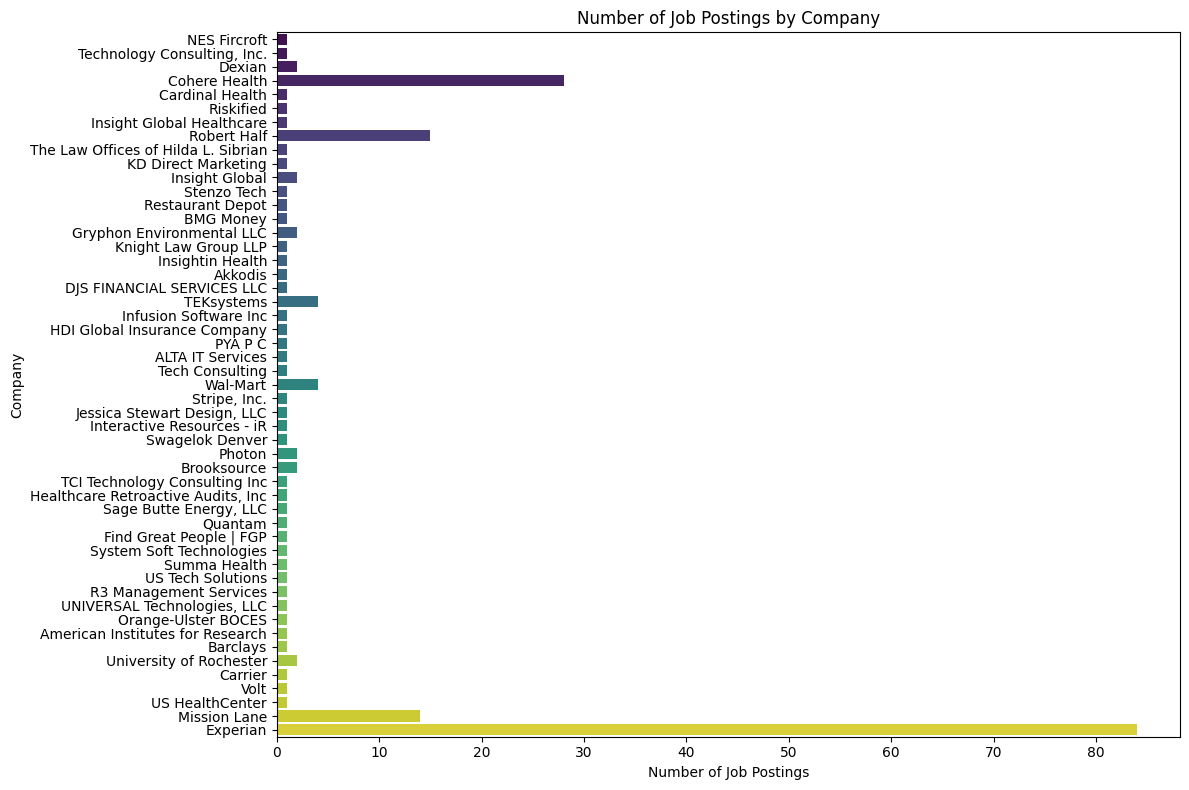

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(y='Company', data=df_jobs, palette='viridis')
plt.title('Number of Job Postings by Company')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


### Analysis Result: Job Postings Trend Over Time

The line plot above reveals a peak in job postings during October, followed by a decline in November. This pattern could be due to several factors:
1. **End-of-Year Budgeting**: Companies often slow hiring in Q4 as budgets get finalized for the year, affecting job posting frequency.
2. **Election Cycle**: Election periods, particularly during national elections, can create temporary economic uncertainty, potentially impacting hiring trends.

This insight into hiring patterns around these events could inform job-seekers or analysts about seasonal fluctuations in job availability.


<ipython-input-108-8e1a468ae2d6>:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_jobs['Date Posted'].dt.to_period('M').value_counts().sort_index().plot(kind='line', marker='o')


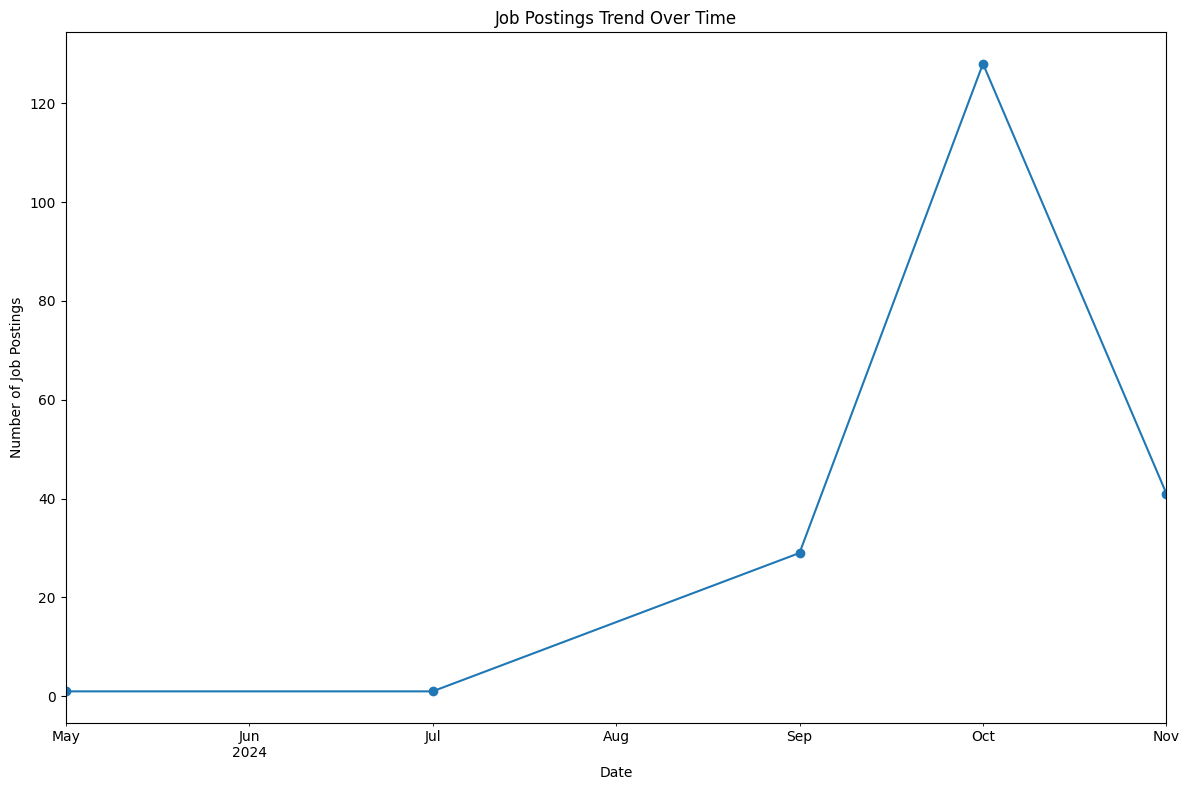

In [ ]:
# Convert 'Date Posted' to datetime
df_jobs['Date Posted'] = pd.to_datetime(df_jobs['Date Posted'], errors='coerce')

# Plot the job postings by date
plt.figure(figsize=(12, 8))
df_jobs['Date Posted'].dt.to_period('M').value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Job Postings Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.show()


###Analysis Result: Top 10 Companies Hiring for Data Analyst Roles

<ipython-input-113-e59c66016c47>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Job Postings', y='Company', data=company_job_counts, palette='viridis')


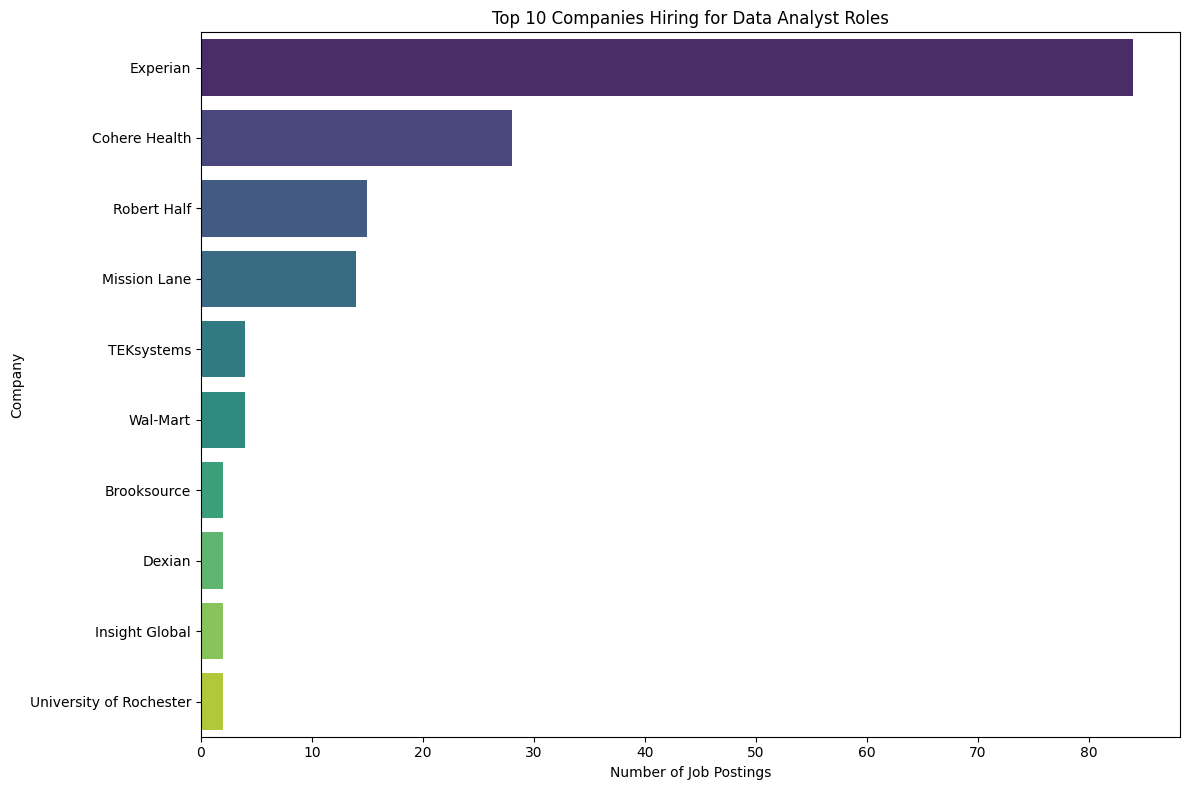

In [ ]:
# Group job postings by company and count the number of postings
company_job_counts = df_jobs['Company'].value_counts().head(10).reset_index()
company_job_counts.columns = ['Company', 'Job Postings']

# Plot the top 10 companies
plt.figure(figsize=(12, 8))
sns.barplot(x='Job Postings', y='Company', data=company_job_counts, palette='viridis')
plt.title('Top 10 Companies Hiring for Data Analyst Roles')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


### Analysis Result: Distribution of Job Postings by Job Title

<ipython-input-110-c088ad35c9bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Job Title', data=df_jobs, palette='Set2', order=df_jobs['Job Title'].value_counts().index)


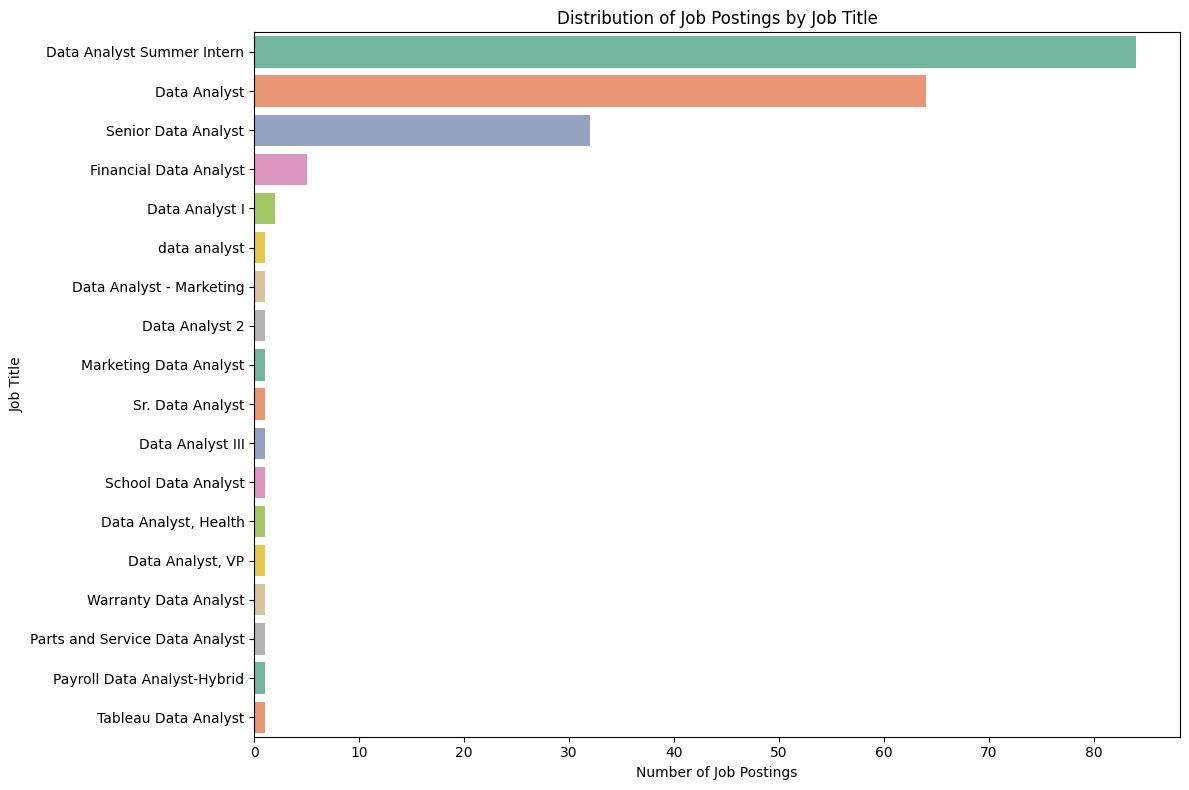

In [ ]:
# Job postings by title
plt.figure(figsize=(12, 8))
sns.countplot(y='Job Title', data=df_jobs, palette='Set2', order=df_jobs['Job Title'].value_counts().index)
plt.title('Distribution of Job Postings by Job Title')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


###Analysis Result: Top 10 Job Titles for Data Analyst Roles

<ipython-input-117-6b0ea9020e7e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Job Title', data=title_counts.head(10), palette='coolwarm')


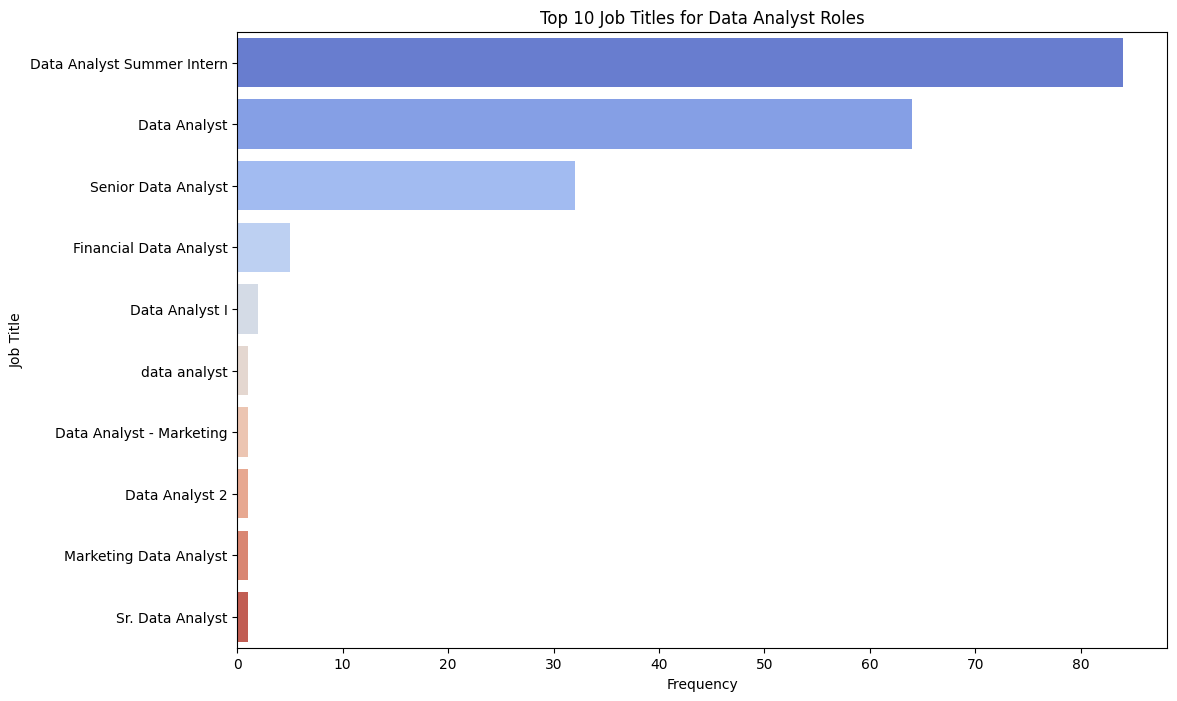

In [ ]:
# Count job titles
title_counts = df_jobs['Job Title'].value_counts().reset_index()
title_counts.columns = ['Job Title', 'Frequency']

# Plot the most common job titles
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Job Title', data=title_counts.head(10), palette='coolwarm')
plt.title('Top 10 Job Titles for Data Analyst Roles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()


In [ ]:
df_jobs.to_csv("df_jobs.csv", index=False)